In [1]:
load('graph_entropy.py')
load('ge_visualize.sage') 
np.set_printoptions(threshold=np.inf)
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from sage.graphs.graph_coloring import first_coloring 
import math
import networkx as nx
import matplotlib.pyplot as plt

# Generate formatted vertex labels in the construction of directed line graph
# Input: Vertices e1 and e2 where e1-e2 forms a directed 2-walk in the original graph
# Output: Vertex label used in the directed line graph of format "[e1,e2]"
def vertex_name(e1, e2):
    return "[" + str(e1) + "," + str(e2) + "]"


# Construct the directed line graph of a directed graph G
# Input: A directed graph G. 
#        It must be a directed graph. Otherwise, we will throw a ValueError and return None.
# Output: The directed line graph of G. 
def directed_line_graph(G): 
    try:
        if not G.is_directed():
            raise ValueError()
    except ValueError:
        print("ValueError: G must be directed. Returning None.")
        return None
    E = G.edges() 
    adjacency_list = {}
    for e1, e2, v in E:
        neighbor = []
        for e3, e4, u in E:
            if not (str(e1) == str(e3) and str(e2) == str(e4)) and (str(e1) == str(e4) or str(e2) == str(e3)):
                neighbor.append(vertex_name(e3,e4))
            
        adjacency_list[vertex_name(e1,e2)] = neighbor
    G = Graph(adjacency_list)
    return G

# Calculate and return the dot product of two vectors a and b.
def dot_product(a, b):
    return sum(x*y for x, y in zip(a, b))

# Determine if two vectors are orthogonal, considering a numerical error threshold epsilon.
def is_orthogonal(a, b, epsilon=1e-10):
    return abs(dot_product(a, b)) < epsilon


# Convert a vector to its string representation.
def vector_to_str(vector):
    return str(vector)

# Find all orthogonal pairs of vectors in the input and return a dictionary of these pairs
# Input: A list of vectors
# Output: A dictionary, the key is each vector in the input. 
#         The value of each key is a list containing all vectors orthogonal to the key.
def find_orthogonal_vectors(vectors, epsilon=1e-10):
    orthogonal_vectors = {}  # Initialize the dictionary to store the result
    
    # Iterate over each vector in the input list
    for i, v_i in enumerate(vectors):
        orthogonal_list = []  # List to store vectors orthogonal to v_i
        
        # Check orthogonality with every other vector, considering epsilon
        for j, v_j in enumerate(vectors):
            if i != j and is_orthogonal(v_i, v_j, epsilon):  # If orthogonal within epsilon
                orthogonal_list.append(vector_to_str(v_j))  # Add to the list of orthogonal vectors
        
        # Map the current vector to its list of orthogonal vectors
        orthogonal_vectors[vector_to_str(v_i)] = orthogonal_list
    
    # Convert tuples back to lists for the final output
    return orthogonal_vectors 




# Determine if the fractional coloring is exactly 3 and all constraint are satisfied without numerical error.
# We use integer arithmetic to avoid the numerical error.
# Input: vertices: the vertex set  
#        denominator: The denominator explained in the end of Chunk 5
#        enumerators: The enumerators explained in the end of Chunk 5
#
# Output: False if some constraint is violated or the value is not exactly 3
#         True if it passes all checking.
def check(vertices, enumerators, denominator):
    succ = True
    
    #This loop checks that Mx >= 1 is true, by checking each row is satisfied.
    for v in vertices:
        val = int(0) 
        for row in enumerators:
            # sum up all X_I s.t. v is in the set I 
            if v in row["ind_set"]:
                val = val + int(row["weight"])
                
        # If the value is less than k, one constraint is violated.        
        if val < denominator:
            print("A constraint is not satisfied:")
            print(v)
            print(val)
            succ = False
            break
    val = int(0)
    for row in enumerators:
        val = val + int(row["weight"]) 
    for v in vertices:
        val = val
    if val != int(3 * denominator):
        print("The value is not exact:")
        print("3 * denominator: ", int(3 * denominator) )
        print("sum: ",val)
        succ = False 
    return succ

# Numerical Calculation of Korner's Entropy

We uses the algorithm provided by Harangi, Niu and Bai for calculation of Korner's Entropy of a graph $\chi_{\kappa}(G)$.
They have provided an excellent tutorial (link: https://www.renyi.hu/~harangi/ge.htm)

We point out that the log base used in their code is the natural log.

For example, suppose we have a complete graph of 2 vertices $K_2$ where $p_X(x)$ is uniform. Then $\chi_{\kappa}(G) = \log_2(2)=1$. The algorithm outputs:

In [2]:

G = nx.Graph()
G.add_node('A')
G.add_node('B') 
G.add_edge('A','B') 
ge=GraphEntropy(find_ind_sets(G))
ge.set_uniform_p()
ge.verbose_mode=True
ge.alt_opt()

20 iterations made (max: 10000)
Graph Entropy:
0.6931471805599453 (error bound: 0.0e+00)


(0.6931471805599453, 0.0)

In [3]:
print('We note that 0.6931471805599453 / ln(2) =', 0.6931471805599453 / math.log(2))
print('log_2(2) = ', math.log(2)/math.log(2))

We note that 0.6931471805599453 / ln(2) = 1.0
log_2(2) =  1.0


# Korner Entropy of $G_{13}$

In [4]:

G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')

G.add_node('M')
G.add_node('L')
G.add_node('N')
G.add_node('P')
G.add_node('Q')
G.add_node('R')

G.add_node('X')
G.add_node('Y')
G.add_node('Z')
G.add_node('W')

G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('C', 'B')


G.add_edge('A', 'M')
G.add_edge('A', 'L')
G.add_edge('M', 'L')

G.add_edge('C', 'R')
G.add_edge('C', 'Q')
G.add_edge('Q', 'R')

G.add_edge('N', 'B')
G.add_edge('P', 'B')
G.add_edge('N', 'P')

G.add_edge('X', 'L')
G.add_edge('X', 'Q')
G.add_edge('X', 'P')

G.add_edge('Y', 'N')
G.add_edge('Y', 'L')
G.add_edge('Y', 'R')

G.add_edge('Z', 'M')
G.add_edge('Z', 'N')
G.add_edge('Z', 'Q')

G.add_edge('W', 'M')
G.add_edge('W', 'P')
G.add_edge('W', 'R')


In [5]:
ge=GraphEntropy(find_ind_sets(G))
ge.set_uniform_p()
ge.verbose_mode=True
ge.alt_opt()


4 sets deleted after 40 iterations: {4,5,8} {4,6,7} {3,6,8} {3,5,7}
12 sets deleted after 90 iterations
320 iterations made (max: 10000)
Graph Entropy:
1.140907878528764 (error bound: 3.1e-09)


(1.140907878528764, 3.068398202188405e-09)

In [6]:
print('We have that 1.140907878528764 / ln(2) =', 1.140907878528764 / math.log(2))

We have that 1.140907878528764 / ln(2) = 1.6459821384645956


Therefore, we conclude
# $H_{\kappa}(G_{13},X) \approx 1.646$

# Korner Entropy of $L(G_{13})$

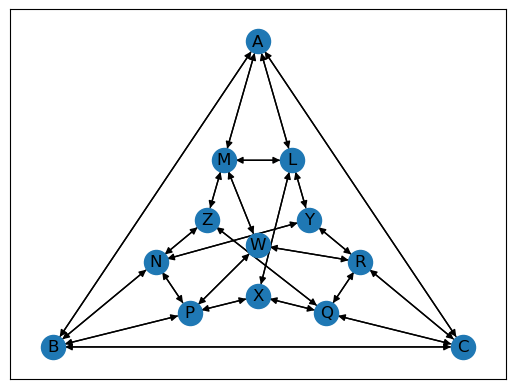

In [7]:
vectors = [
    [1, 0, 0],  #A
    [0, 1, 0],  #B
    [0, 0, 1],  #C
    [0, 1, -1], #M
    [0, 1, 1],  #L
    [1, 0, -1], #P
    [1, 0, 1],  #N
    [1, -1, 0], #R
    [1, 1, 0],  #Q
    [1, 1, 1],  #W
    [1, 1, -1], #Y
    [1, -1, 1], #X
    [-1, 1, 1]  #Z
]

orthogonal_dict = find_orthogonal_vectors(vectors)
G = DiGraph(orthogonal_dict)
G.vertices(sort=True)
labels = list(["Z","C","M","B","L","R","X","P","A","N","Y","Q","W"]) 

G.relabel(perm=labels) 
G.vertices(sort=True)

 
networkx_G = G.networkx_graph() 
scale = 24
pos_dict = {
    'W' : (0*scale, 0*scale),
    'X' : (0*scale, -1 *scale),
    'Y' : (math.sqrt(3)*scale/2, 1/2*scale),
    'Z' : (-math.sqrt(3)*scale/2, 1/2*scale), 
    'M' : (-math.sqrt(3)*scale/3, 5/3 *scale),
    'L' : (math.sqrt(3)*scale/3, 5/3 *scale),
    'N' : (-math.sqrt(3)*scale, -1/3 *scale),
    'P' : (-2*math.sqrt(3)*scale/3, -4/3 *scale),
    'R' : (math.sqrt(3)*scale, -1/3*scale),
    'Q' : (2*math.sqrt(3)*scale/3, -4/3 *scale),
    'A' : (0*scale, 4 * scale),
    'B' : (-2*math.sqrt(3)*scale, -2 *scale),
    'C' : (2*math.sqrt(3)*scale, -2 *scale),
}
nx.draw_networkx(networkx_G, pos_dict, arrowstyle="<|-")
plt.show() 

In [8]:
G = directed_line_graph(G).networkx_graph()     
ge=GraphEntropy(find_ind_sets(G))
ge.set_uniform_p()
ge.verbose_mode=True
ge.alt_opt()

72 sets deleted after 20 iterations
274 sets deleted after 30 iterations
504 sets deleted after 40 iterations
624 sets deleted after 50 iterations
120 sets deleted after 60 iterations
336 sets deleted after 70 iterations
238 sets deleted after 80 iterations
144 sets deleted after 90 iterations
66 sets deleted after 100 iterations
36 sets deleted after 120 iterations
216 sets deleted after 140 iterations
144 sets deleted after 190 iterations
24 sets deleted after 230 iterations
2 sets deleted after 280 iterations: {1,6,7,8,9,14,20,21,27,28,30,31,32,36,38,39,43,44} {3,10,12,13,16,17,18,19,23,24,25,34,35,37,40,45,46,47}
6 sets deleted after 370 iterations: {1,6,7,8,9,11,15,20,21,27,28,31,32,36,38,39,43,44} {1,2,6,7,8,9,14,20,21,26,27,28,30,32,38,39,43,44} {4,6,7,8,9,14,20,21,27,28,30,31,32,36,39,42,43,44} {10,12,13,15,16,17,18,19,23,24,25,34,35,37,42,45,46,47} {3,11,12,13,16,17,18,19,23,24,25,26,34,35,40,45,46,47} {2,3,4,10,12,16,17,18,19,23,25,34,35,37,40,45,46,47}
72 sets deleted after 

(1.0061805980588454, 1.0272644512809848e-08)

In [9]:
print('We have that 1.0061805980588454  / ln(2) =', 1.0061805980588454  / math.log(2))

We have that 1.0061805980588454  / ln(2) = 1.4516117590581876


Therefore, we conclude


# $H_{\kappa}(L(G_{13}),X) \approx 1.45$